# Sanju Mathew - Project on Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [1]:
from random import seed
seed(10)
from tensorflow.random import set_seed
set_seed(10)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Flatten, Dense

### Import the data

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

### Pad each sentence to be of same length
- Taking maximum sequence length as 300

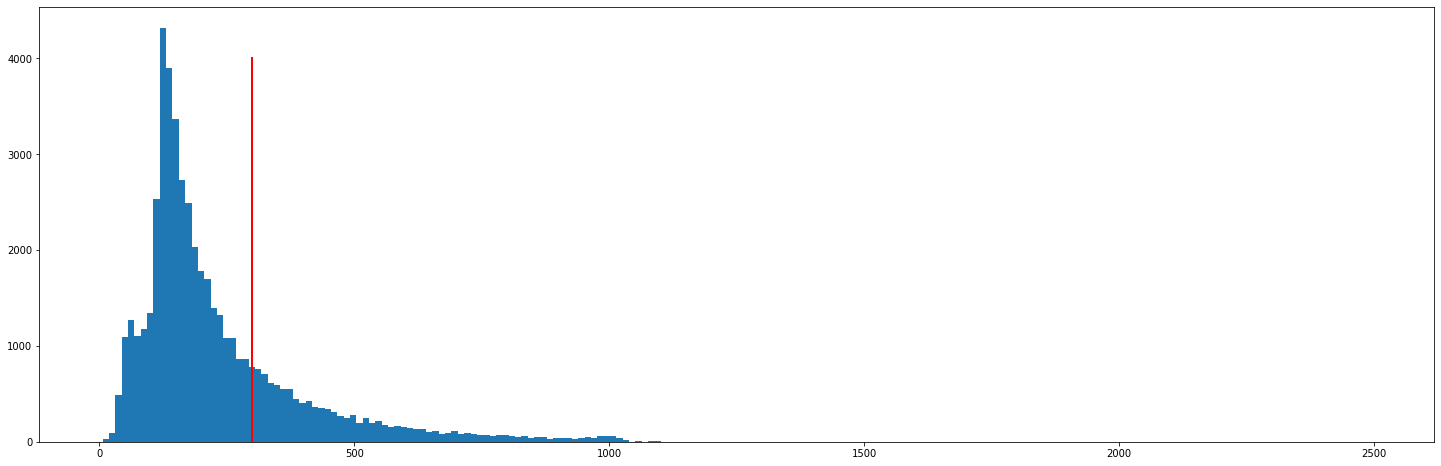

Average review length: 234.75892
Standard deviation: 173.0
No of reviews with length below 300: 38583


In [4]:
length = [len(i) for i in data]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([300, 300], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 300: {}".format(sum(i < 301 for i in length)))

In [5]:
from keras.preprocessing.sequence import pad_sequences
data_padded = pad_sequences(data, padding='post', maxlen=300)

### Print shape of features & labels

Number of review, number of words in each review

In [6]:
print('Number of reviews: {}, Number of words in each review: {}'.format(data_padded.shape[0],data_padded.shape[1]))

Number of reviews: 50000, Number of words in each review: 300


Number of labels

In [7]:
print('Number of labels: {}'.format(labels.shape[0]))

Number of labels: 50000


### Value of one feature and it's label

Feature value

In [8]:
data_padded[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

Label value

In [9]:
labels[0]

1

### Decode the feature value to get original sentence

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [11]:
print(" ".join([reverse_word_index.get(n-3, '#') for n in data_padded[1]]))

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [12]:
labels[1]

0

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_padded, labels, test_size=0.20, random_state=0)

### Define model

In [14]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Print model summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 100)          80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          10100     
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [17]:
history = model.fit(train_X, np.array(train_y), batch_size=300, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
120/120 [==============================] - 17s 146ms/step - loss: 0.4097 - accuracy: 0.7934 - val_loss: 0.2752 - val_accuracy: 0.8892
Epoch 2/3
120/120 [==============================] - 17s 140ms/step - loss: 0.2256 - accuracy: 0.9099 - val_loss: 0.2695 - val_accuracy: 0.8875
Epoch 3/3
120/120 [==============================] - 17s 140ms/step - loss: 0.1789 - accuracy: 0.9308 - val_loss: 0.2980 - val_accuracy: 0.8857


### Evaluate model

In [18]:
results = model.evaluate(test_X, test_y)

313/313 [==============================] - 6s 19ms/step - loss: 0.2949 - accuracy: 0.8886


In [19]:
from sklearn.metrics import confusion_matrix
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

array([[4537,  456],
       [ 658, 4349]])

### Predict on one sample

In [20]:
print('Prediction: {} | Ground Truth: {}'.format(((model.predict(test_X[0].reshape(-1,300)) > 0.5).astype("int32").flatten()), test_y[0]))

Prediction: [1] | Ground Truth: 1


## Summary
* Changing the train, test split from 50% to 20% improved accuracy score by 1.5%